### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [3]:
plt.style.use('dark_background')
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

## Generate Data

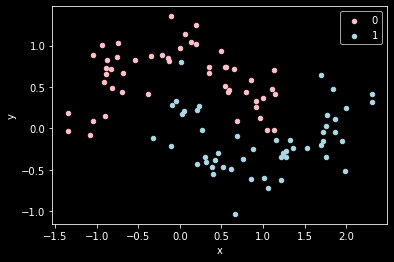

In [6]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'pink', 1:'lightblue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# show plot
plt.show()

In [7]:
# split into train and test
n_train = 30
trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

## Create Simple MLP Model

In [11]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

## Train Model

In [12]:
# init model
model = init_model()

In [13]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0)

In [14]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.967, Valid: 0.843


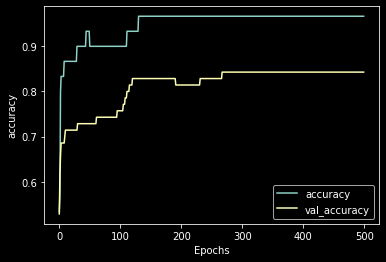

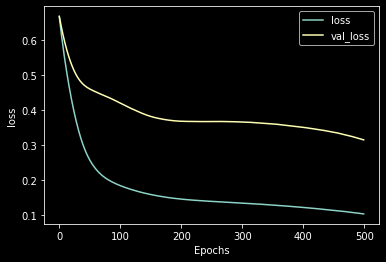

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Train Model (More Epoch)

In [18]:
# init model
model = init_model()

In [19]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0)

In [20]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.914


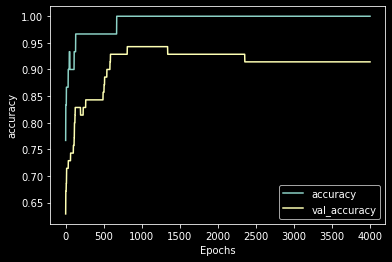

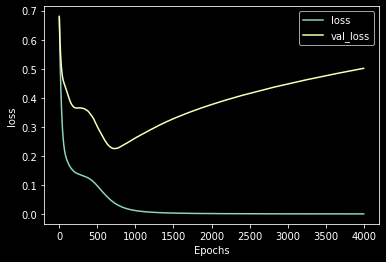

In [21]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Train Model (Overfit with Early Stopping)

In [27]:
# init model
model = init_model()

In [28]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [29]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es])

Epoch 2: early stopping


In [30]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.833, Valid: 0.700


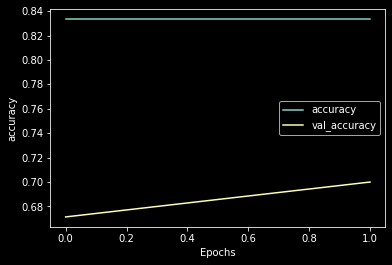

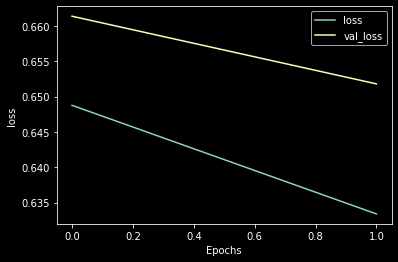

In [31]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Train Model (Overfit with Early Stopping, Patience)

In [32]:
# init model
model = init_model()

In [33]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [34]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es])

Epoch 983: early stopping


In [35]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.943


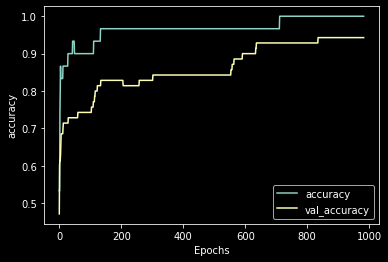

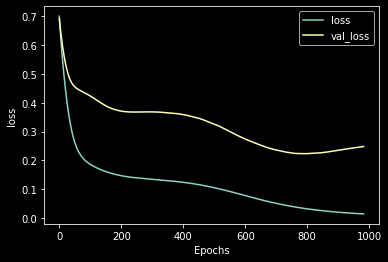

In [36]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Train Model (Overfit with Early Stopping, Patience, Model Checkpoint)

In [37]:
# init model
model = init_model()

In [38]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [39]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [40]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.67143, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.67143

Epoch 3: val_accuracy improved from 0.67143 to 0.68571, saving model to best_model.h5

Epoch 4: val_accuracy did not improve from 0.68571

Epoch 5: val_accuracy did not improve from 0.68571

Epoch 6: val_accuracy did not improve from 0.68571

Epoch 7: val_accuracy improved from 0.68571 to 0.71429, saving model to best_model.h5

Epoch 8: val_accuracy did not improve from 0.71429

Epoch 9: val_accuracy did not improve from 0.71429

Epoch 10: val_accuracy did not improve from 0.71429

Epoch 11: val_accuracy did not improve from 0.71429

Epoch 12: val_accuracy did not improve from 0.71429

Epoch 13: val_accuracy did not improve from 0.71429

Epoch 14: val_accuracy did not improve from 0.71429

Epoch 15: val_accuracy did not improve from 0.71429

Epoch 16: val_accuracy did not improve from 0.71429

Epoch 17: val_accuracy did not improve from 0.71429

Epoch

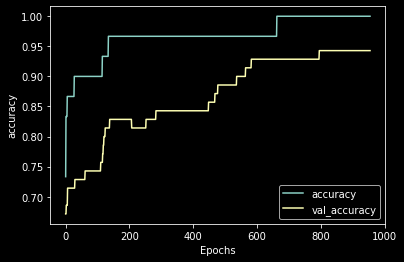

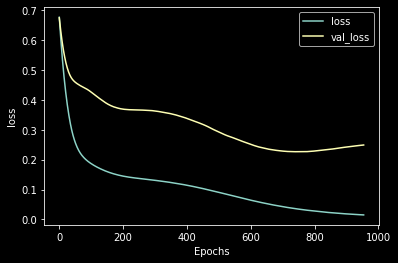

In [41]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

---